In [1]:
import rioxarray
import numpy as np
import matplotlib.pyplot as plt


In [57]:
def print_raster_stats(raster):
    s = raster.rio.shape
    n = s[0]*s[1]
    nnan = np.sum(np.isnan(raster.values))
    mean = np.nanmean(raster.values)
    median = np.nanmedian(raster.values)
    rmin = np.nanmin(raster.values)
    rmax = np.nanmax(raster.values)
    rmsd = np.sqrt(np.nanmean((raster.values)**2))
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"n: {n}\n"
        f"nnan: {nnan}\n"
        f"mean: {mean:.3f}\n"
        f"median:  {median:.3f}\n"
        f"min:  {rmin:.3f}\n"
        f"max:  {rmax:.3f}\n"
        f"RMSD: {rmsd:.3f}\n"
        f"CRS: {raster.rio.crs}\n"
    )
    return n, nnan, mean, median, rmin, rmax, rmsd

In [58]:
ddir = "F:/TownNeckBeach_Testing/"
# will compute run1 - run2
run1 = 1
run2 = 2
infile1 = ddir+"TNB_CLASSIFY_{}_test.tif".format(run1)
infile2 = ddir+"TNB_CLASSIFY_{}_test.tif".format(run2)
outfile = ddir+"TNB_{}_minus_{}.tif".format(run1,run2)
outtitle = 'TNB_{}_minus_{}'.format(run1,run2)

r1 = rioxarray.open_rasterio(
    infile1,
    masked=True
)
r2 = rioxarray.open_rasterio(
    infile2,
    masked=True
)
print(infile1)
print_raster_stats(r1)
print(infile2)
print_raster_stats(r2)

F:/TownNeckBeach_Testing/TNB_CLASSIFY_1_test.tif
shape: (3920, 4560)
resolution: (0.25, -0.25)
bounds: (376330.0, 4624355.0, 377470.0, 4625335.0)
n: 17875200
nnan: 13433158
mean: 1.511
median:  1.334
min:  -37.272
max:  7.940
RMSD: 2.228
CRS: None

F:/TownNeckBeach_Testing/TNB_CLASSIFY_2_test.tif
shape: (3920, 4560)
resolution: (0.25, -0.25)
bounds: (376330.0, 4624355.0, 377470.0, 4625335.0)
n: 17875200
nnan: 13681623
mean: 1.535
median:  1.349
min:  -37.200
max:  10.917
RMSD: 2.251
CRS: None



(17875200,
 np.int64(13681623),
 np.float32(1.5350552),
 np.float32(1.349),
 np.float32(-37.2),
 np.float32(10.917),
 np.float32(2.2505765))

In [59]:
r1_minus_r2 = r1-r2
stats = print_raster_stats(r1_minus_r2)
stext = \
        f"n: {stats[0]}\n"+\
        f"nnan: {stats[1]}\n"+\
        f"mean: {stats[2]:.3f}\n"+\
        f"median:  {stats[3]:.3f}\n"+\
        f"min:  {stats[4]:.3f}\n"+\
        f"max:  {stats[5]:.3f}\n"+\
        f"RMSD: {stats[6]:.3f}\n"
print(stext)

shape: (3920, 4560)
resolution: (0.25, -0.25)
bounds: (376330.0, 4624355.0, 377470.0, 4625335.0)
n: 17875200
nnan: 13708175
mean: 0.009
median:  0.013
min:  -3.052
max:  16.172
RMSD: 0.054
CRS: None

n: 17875200
nnan: 13708175
mean: 0.009
median:  0.013
min:  -3.052
max:  16.172
RMSD: 0.054



In [60]:
r1_minus_r2.rio.to_raster(outfile, driver="GTiff", compress="LZW")

In [61]:
x = r1_minus_r2.x.values
y = r1_minus_r2.y.values
z = np.squeeze(r1_minus_r2.values)
np.shape(z)

(3920, 4560)

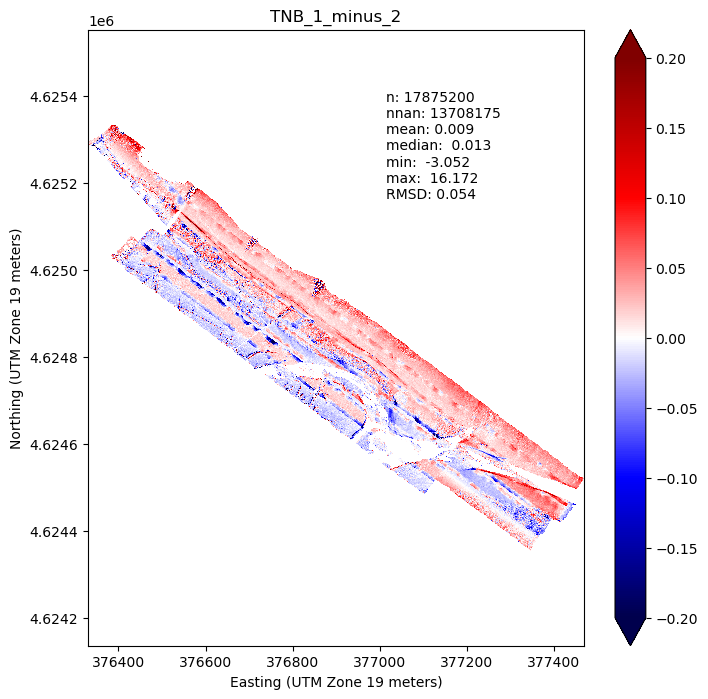

In [62]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
m = ax.pcolormesh(x, y, z, vmin=-.2, vmax=.2, cmap='seismic')
ax.set_xlabel('Easting (UTM Zone 19 meters)')
ax.set_ylabel('Northing (UTM Zone 19 meters)')
plt.axis('equal')
plt.colorbar(m, extend='both')
plt.text(.6, .7, stext, transform=ax.transAxes)
plt.title(outtitle)
plt.savefig(ddir+outtitle+'.jpg', dpi=200, bbox_inches='tight')